## Algoritma Malaria 

1. initialize simulation_length,delta_t
2. numIteration := simulation_length/delta_t
3. for i from 0 through numIteration do the following
        function Human (**input**: vectors, mosquitoes, immunity_rate, malaria_induced_death_rate, recovery_rate, vectors, mosquitoes **output** : human, prob_host) 
            flow_to_immune := immunity_rate*human_host
            human_host_death := malaria_induced_death_rate*human_host
            recovered := recovery_rate*human_host
            flow_to_host := (prob_bit*vectors*uninfected_humans)/mosquitoes
            human := uninfected_humans + human_host + immune
            uninfected_humans := uninfected_humans + (recovered-flow_to_host)*delta_t
            human_host := human_host + (flow_to_host-recovered-human_host_death-flow_to_immune)*delta_t
            immune := immune + (flow_to_immune)*delta_t
            human := human_host + uninfected_human_host + immune
            human_death := human_death + (human_host_death)*delta_t
            prob_host := human_host/human
            display(uninfected_humans,human_host,immune,human_death,prob_host)
        end
        function nyamuk (**input**: uninfected_mosquitoes, vectors, mosquito_death_rate, prob_host, mosquito_birth_rate, prob_bite_human :
            vector_deaths := mosquito_death_rate*vectors
            mosquitoes := uninfected_mosquitoes + vectors
            uninfected_mosquito_death := mosquito_death_rate*uninfected_mosquitoes
            mosquito_birth = mosquito_birth_rate*mosquitoes
            infected := prob_bite_human x prob_host x uninfected_mosquitoes
            uninfected_mosquitoes := uninfected_mosquitoes + (mosquito_birth - uninfected_mosquito_death - infected)*delta_t
            vectors := vectors + (infected - vector_deaths)*delta_t
            vector_deceased := vector_deseaced + (vector_deaths)*delta_t
            prob_vector := vectors/mosquitoes
            display(vectors,uninfected_mosquitoes,vector_deceased, prob_vector)
        end
    end
4. stop
            

,waktu,uninfected_human,human_host,immune,vectors,uninfected_mosquitoes,human_death,vector_deceased
0,0.00,300.000000,1.000000,0.000000,0.000000,300.000000,0.000000,0.000000
1,0.25,300.075000,0.921250,0.002500,0.068864,299.931136,0.001250,0.000000
2,0.50,300.138928,0.853868,0.004803,0.132506,299.867494,0.002402,0.000172
3,0.75,300.193025,0.796568,0.006938,0.191693,299.808307,0.003469,0.000503
4,1.00,300.238382,0.748225,0.008929,0.247109,299.752891,0.004465,0.000983
...,...,...,...,...,...,...,...,...
796,199.00,52.270678,43.828234,136.600725,258.013153,41.986847,68.300363,435.938786
797,199.25,52.186165,43.748391,136.710296,257.960286,42.039714,68.355148,436.583819
798,199.50,52.101805,43.668695,136.819667,257.907355,42.092645,68.409833,437.228719
799,199.75,52.017597,43.589145,136.928839,257.854361,42.145639,68.464419,437.873488


Text(0, 0.5, 'populasi')

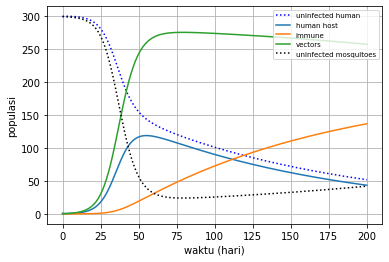

In [51]:
# Program
# Diambil dari Equation Set 4.4.1
import matplotlib.pyplot as plt
import pandas as pd

def Malaria(simulation_length,delta_t):
    numIteration = int(simulation_length/delta_t)+1
    malaria_induced_death_rate = 0.005
    mosquito_birth_rate = 0.01
    mosquito_death_rate = 0.01
    prob_bite_human = 0.3
    vectors = 0
    vector_deceased = 0
    uninfected_mosquitoes = 300
    mosquitoes = vectors + uninfected_mosquitoes
    uninfected_human = 300
    human_host = 1
    immune = 0
    human_death = 0
    prob_bit = 0.3
    recovery_rate = 0.3
    immunity_rate = 0.01
    malaria_induced_death_rate = 0.005
    
    arr_t = [0 for i in range(numIteration)]
    arr_uninfected_human = [0 for i in range(numIteration)]
    arr_human_host = [0 for i in range(numIteration)]
    arr_immune = [0 for i in range(numIteration)]
    arr_vectors = [0 for i in range(numIteration)]
    arr_uninfected_mosquitoes = [0 for i in range(numIteration)]
    arr_human_death = [0 for i in range(numIteration)]
    arr_vector_deceased = [0 for i in range(numIteration)]
    
    arr_t[0] = 0
    arr_uninfected_human[0] = 300
    arr_human_host[0] = 1
    arr_immune[0] = 0
    arr_vectors[0] = vectors
    arr_uninfected_mosquitoes[0] = 300
    arr_human_death[0] = human_death
    arr_vector_deceased[0] = vector_deceased
    
    for i in range(1, numIteration):
        t = i*delta_t
        arr_t[i] = t
        
        flow_to_immune = immunity_rate*human_host
        human_host_death = malaria_induced_death_rate*human_host
        recovered = recovery_rate*human_host
        flow_to_host = (prob_bit*vectors*uninfected_human)/mosquitoes
            
        uninfected_human = uninfected_human + (recovered-flow_to_host)*delta_t
        arr_uninfected_human[i] = uninfected_human
        human_host = human_host + (flow_to_host-recovered-human_host_death-flow_to_immune)*delta_t
        arr_human_host[i] = human_host
        immune = immune + (flow_to_immune)*delta_t
        arr_immune[i] = immune
        human = human_host + uninfected_human + immune
        human_death = human_death + (human_host_death)*delta_t
        arr_human_death[i] = human_death
        prob_host = human_host/human
        
        vector_deaths = mosquito_death_rate*vectors
        mosquitoes = uninfected_mosquitoes + vectors
        uninfected_mosquito_death = mosquito_death_rate*uninfected_mosquitoes
        mosquito_birth = mosquito_birth_rate*mosquitoes
        infected = prob_bite_human*prob_host*uninfected_mosquitoes
            
        uninfected_mosquitoes = uninfected_mosquitoes+(mosquito_birth - infected - uninfected_mosquito_death)*delta_t
        arr_uninfected_mosquitoes[i] = uninfected_mosquitoes
        vectors = vectors + (infected - vector_deaths)*delta_t
        arr_vectors[i] = vectors
        vector_deceased = vector_deceased + (vector_deaths)*delta_t
        arr_vector_deceased[i] = vector_deceased
        prob_vector = vectors/mosquitoes

    return(arr_t, arr_uninfected_human,arr_human_host, arr_immune, arr_vectors, arr_uninfected_mosquitoes,arr_human_death,arr_vector_deceased)

df = pd.DataFrame(Malaria(200,0.25))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'uninfected_human',2:'human_host',3:'immune',4:'vectors',5:'uninfected_mosquitoes',6:'human_death',7:'vector_deceased'})
display(df)

plt.plot(df.waktu,df.uninfected_human,':',color="blue",label = "uninfected human")
plt.plot(df.waktu,df.human_host,label="human host")
plt.plot(df.waktu,df.immune,label = "immune")
plt.plot(df.waktu,df.vectors,label = "vectors")
plt.plot(df.waktu,df.uninfected_mosquitoes,":",color="black",label = "uninfected mosquitoes")

plt.grid(True)
plt.legend(loc=1, prop={'size': 7})
plt.xlabel("waktu (hari)")
plt.ylabel("populasi")